In [1]:
from matplotlib import pyplot as plt
from collections import Counter

# Single Set of Data

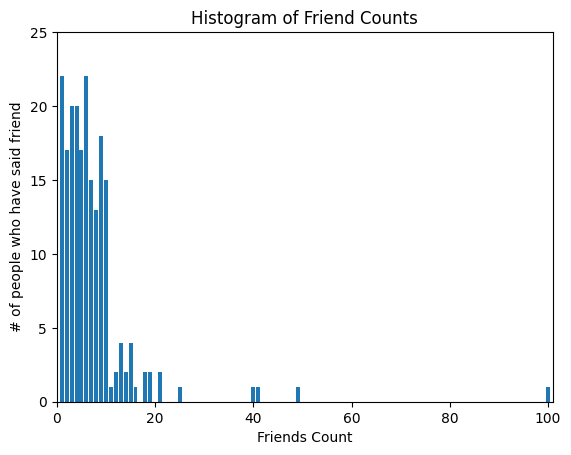

In [59]:
num_of_friends = [100, 49, 41, 40, 25, 32, 40, 42, 45, 45, 71, 32, 33, 34, 34, 35, 21, 22, 22, 24, 23, 25, 18, 30, 31]
num_friends  = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friends_counted = Counter(num_friends)
xs = range(101)
ys = [friends_counted[x] for x in xs] # buat ngekumpulin jumlah temen tiap value (1: berapa temen)
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("Friends Count")
plt.ylabel("# of people who have said friend")

plt.show()

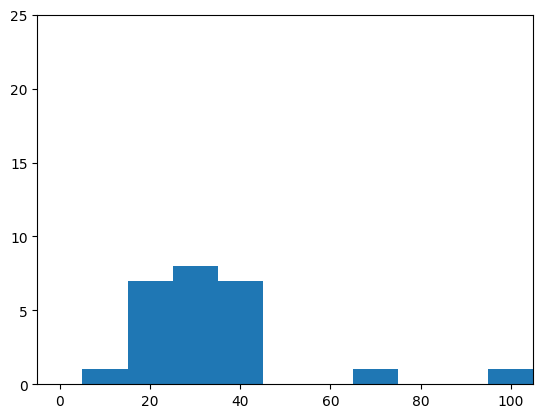

In [61]:
# bisa juga digrouping

# Note: dua data berbeda

decile = lambda x: (x // 10) * 10
grouped_friends = Counter(decile(x) for x in num_of_friends)
group_of_tens = [x*10 for x in range (11)]
ys_new = [grouped_friends[x] for x in group_of_tens]

plt.bar(group_of_tens, ys_new, 10)
plt.axis([-5, 105, 0, 25 ])

plt.show()


In [62]:
num_points = len(num_friends) #25 data points

In [64]:
largest_values = max(num_friends)
smallest_values = min(num_friends)

print(largest_values, smallest_values)

100.0 1


In [65]:
sorted_friends = sorted(num_friends)

print(sorted_friends)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100.0]


### Central Tendencies

In [66]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends)

7.333333333333333

In [73]:
def median(x):
    n = len(x)
    sorted_x = sorted(x)
    mid_point = n // 2

    if n % 2 == 1:
        return sorted_x[mid_point]
    else:
        high = mid_point
        low = mid_point - 1

        return sorted_x[high] - sorted_x[low] / 2
    
median(num_friends)


3.0

In [74]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

a = quantile(num_friends, 0.10)
b = quantile(num_friends, 0.25)
c = quantile(num_friends, 0.75)
d = quantile(num_friends, 0.90)

print(a, b, c, d)

1 3 9 13


In [75]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    list_of_max_values = []

    for item, count in counts.items():
        if count == max_count:
            list_of_max_values.append(item)

    return list_of_max_values


mode(num_friends)

[6, 1]

### Dispersion

In [76]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99.0

In [39]:
def dot(v, w):
    return sum(v_i * w_i
               for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    return dot(v,v)

In [77]:
# Menghitung jarang masing-masing data dengan mean
def de_mean(x):
    x_bar = mean(x)
    return [x_ - x_bar for x_ in x]

# Mencari 'variance'
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / ( n - 1 ) # Jangan lupa index mulai dari 0

variance(num_friends)

81.54351395730716

In [78]:
import math

# Std deviation juga bisa dibilang rata-rata jarak antara nilai tengah dan masing-masing data
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [79]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

### Correlation

In [43]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [44]:
def covariance(x, y):
    # Bayagkan ini dua row dan memiliki length yang sama
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n -1)

covariance(num_friends, daily_minutes)

22.425435139573064